# DS 3000 - Assignment 4

**Student Name**: [Ji Yoon Rhee]

**Date**: [Apr 3, 2022]

Load the data into a DataFrame and use the random forest algorithm to build a machine learning model that predicts the tip_amount. Ensure that you:

- (10 pts) Include any previous data preparation steps, EDA and visualizations. Its ok to copy and paste your code. However, ensure that you update the code based on the previous feedback from the TAs.
- (5 pts) Partition the data into train/test split.
- (5 pts) Select the required features to build your model based on the insights from your EDA. Briefly explain the reason for the features that you selected. Ensure that you encode any categorical features.
- (15 pts) Build a model that predicts the tip amount.
  Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.
- (5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the correct metric. Remember that we evaluate models differently depending on the task, i.e. classification or regression.
- (10 pts) How do you feel about the model? Does it do a good job of predicting the tip_amount?
  Tweak the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation (Links to an external site.) to learn more about this algorithm and its parameters. Try at least three different values for the n_estimators parameter to determine if the predictions improved (or did they get worse)? Show your steps.
- (+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Can you find out which of your selected features were the most important when making the predictions?

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

1. Include any previous data preparation steps, EDA and visualizations. Its ok to copy and paste your code. However, ensure that you update the code based on the previous feedback from the TAs.

In [2]:
# importing csv data: 
tripdata_df = pd.read_csv('green_tripdata_2019-12.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# summary of the data frame before performing EDA:
print("Dimensions:", tripdata_df.shape, "\n")
tripdata_df.info()

Dimensions: (450627, 20) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450627 entries, 0 to 450626
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               359902 non-null  float64
 1   lpep_pickup_datetime   450627 non-null  object 
 2   lpep_dropoff_datetime  450627 non-null  object 
 3   store_and_fwd_flag     359902 non-null  object 
 4   RatecodeID             359902 non-null  float64
 5   PULocationID           450627 non-null  int64  
 6   DOLocationID           450627 non-null  int64  
 7   passenger_count        359902 non-null  float64
 8   trip_distance          450627 non-null  float64
 9   fare_amount            450627 non-null  float64
 10  extra                  450627 non-null  float64
 11  mta_tax                450627 non-null  float64
 12  tip_amount             450627 non-null  float64
 13  tolls_amount           450627 non-null  float64
 14  ehail_fee

In [4]:
# checking null/NA values:
tripdata_df.isnull().sum()

VendorID                  90725
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        90725
RatecodeID                90725
PULocationID                  0
DOLocationID                  0
passenger_count           90725
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                450627
improvement_surcharge         2
total_amount                  0
payment_type              90725
trip_type                 90727
congestion_surcharge      90727
dtype: int64

In [5]:
# dropping the coloumn that is not included in the data frame:
tripdata_df.drop(columns=['ehail_fee'], inplace=True)

In [6]:
# checking null/NA values after dropping 'ehail_fee':
tripdata_df.isnull().sum()

VendorID                 90725
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       90725
RatecodeID               90725
PULocationID                 0
DOLocationID                 0
passenger_count          90725
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        2
total_amount                 0
payment_type             90725
trip_type                90727
congestion_surcharge     90727
dtype: int64

In [7]:
# checking null/NA values after dropping 'ehail_fee':
tripdata_df.dropna(inplace=True)
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359900 entries, 0 to 359901
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               359900 non-null  float64
 1   lpep_pickup_datetime   359900 non-null  object 
 2   lpep_dropoff_datetime  359900 non-null  object 
 3   store_and_fwd_flag     359900 non-null  object 
 4   RatecodeID             359900 non-null  float64
 5   PULocationID           359900 non-null  int64  
 6   DOLocationID           359900 non-null  int64  
 7   passenger_count        359900 non-null  float64
 8   trip_distance          359900 non-null  float64
 9   fare_amount            359900 non-null  float64
 10  extra                  359900 non-null  float64
 11  mta_tax                359900 non-null  float64
 12  tip_amount             359900 non-null  float64
 13  tolls_amount           359900 non-null  float64
 14  improvement_surcharge  359900 non-nu

In [8]:
# changing data types for columns in the modified data frame: 

tripdata_df['VendorID'] = tripdata_df['VendorID'].astype(int)

tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype(int)

tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype(int)

tripdata_df['payment_type'] = tripdata_df['payment_type'].astype(int)

tripdata_df['trip_type'] = tripdata_df['trip_type'].astype(int)

tripdata_df['lpep_pickup_datetime'] = tripdata_df['lpep_pickup_datetime'].astype('datetime64')

tripdata_df['lpep_dropoff_datetime'] = tripdata_df['lpep_dropoff_datetime'].astype('datetime64')

tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('string')

In [9]:
# removing invalid data from the data frame:
tripdata_df.drop(tripdata_df[tripdata_df['VendorID'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['RatecodeID'] < 1].index, inplace = True)
tripdata_df.drop(tripdata_df[tripdata_df['RatecodeID'] > 6].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['PULocationID'] < 0].index, inplace = True)
tripdata_df.drop(tripdata_df[tripdata_df['DOLocationID'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['passenger_count'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['trip_distance'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['fare_amount'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['extra'] < 0.5].index, inplace = True)
tripdata_df.drop(tripdata_df[tripdata_df['extra'] > 1.0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['mta_tax'] != 0.5].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['tip_amount'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['tolls_amount'] < 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['improvement_surcharge'] != 0.3].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['total_amount'] <= 0].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['payment_type'] < 1].index, inplace = True)
tripdata_df.drop(tripdata_df[tripdata_df['payment_type'] > 6].index, inplace = True)

tripdata_df.drop(tripdata_df[tripdata_df['trip_type'] < 1].index, inplace = True)
tripdata_df.drop(tripdata_df[tripdata_df['trip_type'] > 2].index, inplace = True)

#encoding the categorical feature:
tripdata_df = pd.get_dummies(tripdata_df, drop_first=True)

In [10]:
# summary of the modified data frame:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165810 entries, 0 to 359901
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               165810 non-null  int32         
 1   lpep_pickup_datetime   165810 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  165810 non-null  datetime64[ns]
 3   store_and_fwd_flag     165810 non-null  string        
 4   RatecodeID             165810 non-null  int32         
 5   PULocationID           165810 non-null  int64         
 6   DOLocationID           165810 non-null  int64         
 7   passenger_count        165810 non-null  int32         
 8   trip_distance          165810 non-null  float64       
 9   fare_amount            165810 non-null  float64       
 10  extra                  165810 non-null  float64       
 11  mta_tax                165810 non-null  float64       
 12  tip_amount             165810 non-null  floa

In [11]:
tripdata_df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1,145,145,1,0.00,3.0,0.5,0.5,0.00,0.00,0.3,4.30,2,1,0.00
1,2,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1,24,41,1,0.67,5.5,0.5,0.5,2.04,0.00,0.3,8.84,1,1,0.00
2,2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1,74,41,1,0.61,4.5,0.5,0.5,0.00,0.00,0.3,5.80,2,1,0.00
3,2,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1,255,157,1,3.90,14.0,0.5,0.5,0.00,0.00,0.3,15.30,2,1,0.00
4,2,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1,80,255,1,0.50,4.5,0.5,0.5,0.00,0.00,0.3,5.80,2,1,0.00
5,1,2019-12-01 00:14:28,2019-12-01 00:19:39,N,1,21,123,1,1.10,6.0,0.5,0.5,0.00,0.00,0.3,7.30,2,1,0.00
6,1,2019-12-01 00:45:54,2019-12-01 00:52:46,N,1,181,228,1,1.50,7.5,0.5,0.5,0.00,0.00,0.3,8.80,2,1,0.00
7,2,2019-12-01 00:25:35,2019-12-01 01:04:08,N,1,7,53,1,7.42,30.0,0.5,0.5,0.00,0.00,0.3,31.30,2,1,0.00
8,1,2019-12-01 00:43:12,2019-12-01 00:56:44,N,1,75,223,1,5.30,16.5,0.5,0.5,0.00,6.12,0.3,23.92,2,1,0.00
9,2,2019-12-01 00:56:08,2019-12-01 01:05:11,N,1,112,232,1,2.64,10.0,0.5,0.5,2.81,0.00,0.3,16.86,1,1,2.75


In [12]:
tripdata_df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,165810.0,165810.000000,165810.000000,1.658100e+05,165810.000000,165810.000000,165810.000000,165810.000000
mean,1.871449,1.002714,106.504885,126.888674,1.333792,2.521852,11.171414,0.709713,0.5,1.180346,0.092330,3.000000e-01,14.288998,1.479832,1.000169,0.309114
std,0.334703,0.090192,69.925419,75.700410,0.996499,2.863725,8.994402,0.246733,0.0,2.448831,0.775827,6.548670e-13,10.393142,0.512960,0.012994,0.868556
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,2.500000,0.500000,0.5,0.000000,0.000000,3.000000e-01,3.800000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,65.000000,61.000000,1.000000,0.990000,6.000000,0.500000,0.5,0.000000,0.000000,3.000000e-01,8.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.630000,8.500000,0.500000,0.5,0.000000,0.000000,3.000000e-01,11.300000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,146.000000,189.000000,1.000000,2.950000,13.000000,1.000000,0.5,2.000000,0.000000,3.000000e-01,16.560000,2.000000,1.000000,0.000000
max,2.000000,4.000000,265.000000,265.000000,6.000000,59.480000,487.500000,1.000000,0.5,441.000000,32.500000,3.000000e-01,488.800000,5.000000,2.000000,2.750000


2. Partition the data into train/test split.
3. Select the required features to build your model based on the insights from your EDA. Briefly explain the reason for the features that you selected. Ensure that you encode any categorical features.
4. Build a model that predicts the tip amount. Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [13]:

#partitioning the data into train/test split:
X   = tripdata_df[['payment_type', 'total_amount']] #get the input features
y   = tripdata_df['tip_amount']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

The features I selected are payment type and the total amount (of fare the passengers needed to pay), because the amount of tip that the passengers pay is dependent on how much the total amount of fare is after the entire trip, whcih includes the tax and miscellaneous extra fare, as well as the payment type, since it is given that depending on the  payment type, the tips are either included or not.

In [14]:
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

Since we are trying to predict the tip amount, which is a numerical data, we are going to perform regression rather than classification. We are building a random forest regressor model with our training data subsets. 

5. Evaluate the predictions from your model and comment on the results. Ensure that you choose the correct metric. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [15]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

print("The predicted tip amount for the test set is: {}".format(y_pred))

The predicted tip amount for the test set is: [0.         2.4662     1.70362088 ... 0.         0.         1.37368058]


In [16]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 2.034897584820699


The mean squared error for this model is about 2.35. We don't have any other mean squared error values to compare with, but the mse value for this particular model is pretty low, which implies that we are pretty close to the line of best fit with the model (or the predicted values are close to our line of best fit). 

6. How do you feel about the model? Does it do a good job of predicting the tip_amount? Tweak the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation (Links to an external site.) to learn more about this algorithm and its parameters. Try at least three different values for the n_estimators parameter to determine if the predictions improved (or did they get worse)? Show your steps.

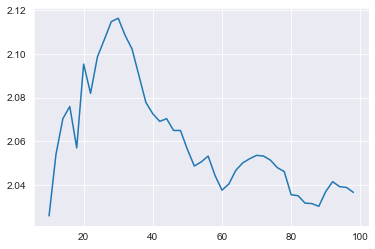

In [24]:
mse_list = {}
for n in range(10, 100, 2): #incrementing by 10
    rf = RandomForestRegressor(random_state=7, n_estimators = n)
    rf.fit(X_train, y_train)
    y_pred   = rf.predict(X_test)
    mse_list[n] = mean_squared_error(y_test, y_pred)

sns.lineplot(x=mse_list.keys(), y=mse_list.values())
plt.show()

Given the range from 10 to 100, I made a loop which creates a new random forest regressor with the ith value as the n-estimator and store the mse value in a list, which is visualized as the line graph above. As we can see, the bigger the n-estimator value is, the smaller the mse value gets, which tells us that the model becomes more accurate and the predictions are closer in value to what the line of best fit predicts. 

The default n-estimator for random forest is 100, which resulted in 2.03. This means that compared to the case when you have any n-estimator values less than 100, the current model with the default n-estimator is the most accurate and trustworthy, meaning that it does comparatively the best job of predicting the tip amount. 